# XG325: Explainable Artificial Intelligence
    
## Feature Engineering

**Week 04 | Lecture 02**

_Saturday, March 29, 2025_

Presented by Dr. Marcin Abram

Dodać szum
Użyć funkcji nieliniowej, nieróżniczkowalnej

### Load and Explore the Dataset

In [256]:
import numpy
import pandas
import sklearn.linear_model
import sklearn.metrics

import matplotlib.pyplot as plt
%matplotlib inline

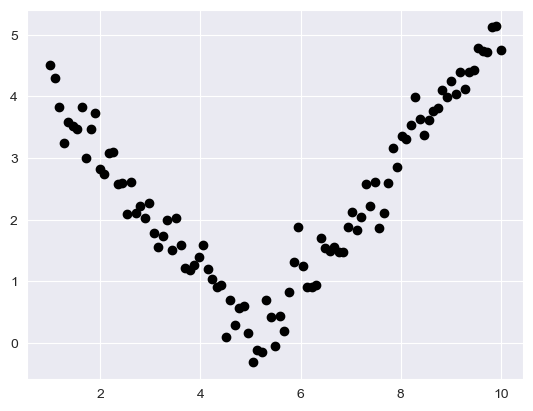

In [257]:
# Generate Dataset
numpy.random.seed(45)
x = numpy.linspace(start=1, stop=10, num=101).reshape(-1, 1)
y = 0.5*x + 3*numpy.log(x) + numpy.random.normal(0, 0.3, size=(101, 1)) + numpy.random.normal(0, 0.9, size=(101, 1))

y = numpy.abs(x - 5) + numpy.random.normal(0, 0.3, size=(101, 1))

# Plot
plt.plot(x, y, 'ko')

### Naive Model

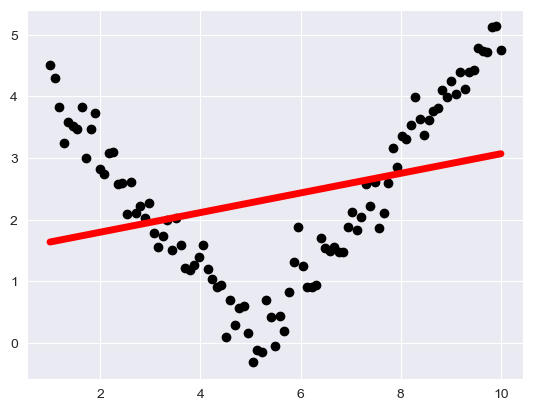

In [258]:
# Train the Linear Regression
reg1 = sklearn.linear_model.LinearRegression()
reg1.fit(x, y)
 
# Plot results
plt.plot(x, y, 'ko')
plt.plot(x, reg1.predict(x), 'r-', linewidth=5)
plt.show()

In [259]:
sklearn.metrics.mean_absolute_error(reg1.predict(x), y)

1.1559425585084877

### Feature Engineering

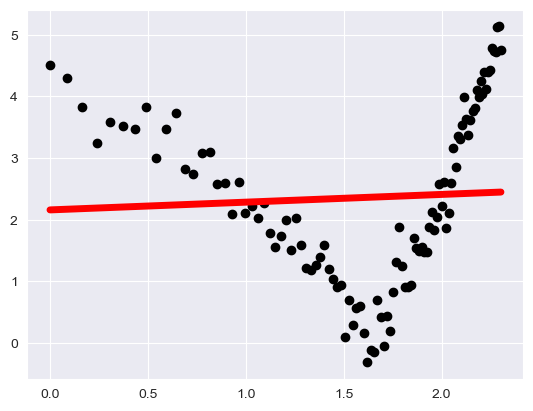

In [260]:
# Define transformations
transformation = lambda x: numpy.log(x)

# Define and fit a linear regression model
reg2 = sklearn.linear_model.LinearRegression()
reg2.fit(transformation(x), y)

# Plot
plt.plot(transformation(x), y, 'ko')
plt.plot(transformation(x), reg2.predict(transformation(x)), 'r-', linewidth=5); plt.show()

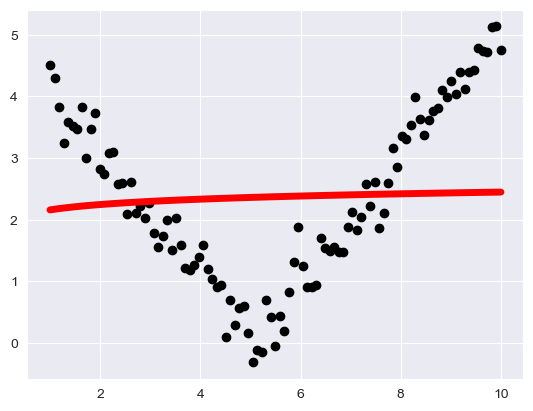

In [261]:
# Apply the inverse transofrmation
plt.plot(x, y, 'ko')
plt.plot(x, reg2.predict(transformation(x)), 'r-', linewidth=5); plt.show()

In [262]:
sklearn.metrics.mean_absolute_error(reg2.predict(transformation(x)), y)

1.209467823643822

## Higher Order Terms

In [263]:
xx = pandas.DataFrame.from_dict({
    'x1': x.flatten(),
    'x2': x.flatten()**2,
    'x3': x.flatten()**3,
    'x4': x.flatten()**4
})
xx

,x1,x2,x3,x4
0,1.00,1.0000,1.000000,1.000000
1,1.09,1.1881,1.295029,1.411582
2,1.18,1.3924,1.643032,1.938778
3,1.27,1.6129,2.048383,2.601446
4,1.36,1.8496,2.515456,3.421020
...,...,...,...,...
96,9.64,92.9296,895.841344,8635.910556
97,9.73,94.6729,921.167317,8962.957994
98,9.82,96.4324,946.966168,9299.207770
99,9.91,98.2081,973.242271,9644.830906


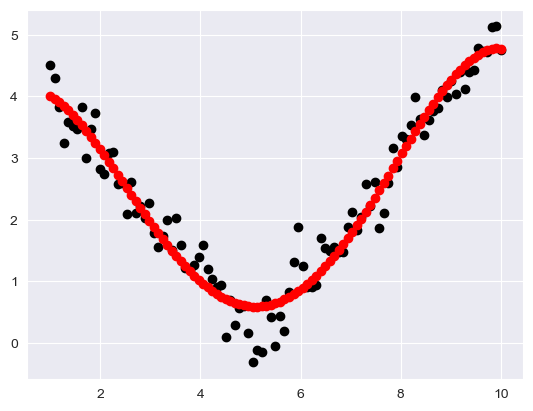

In [264]:
# Define and fit a linear regression model
reg3 = sklearn.linear_model.LinearRegression()
reg3.fit(xx, y)

# Plot
plt.plot(x, y, 'ko')
plt.plot(x, reg3.predict(xx), 'ro', linewidth=1); plt.show()

In [265]:
sklearn.metrics.mean_absolute_error(reg3.predict(xx), y)

0.25596060827858846

### Extrapolation

In [266]:
reg3.intercept_, reg3.coef_

(array([3.87222248]),
 array([[ 0.93613961, -0.95376869,  0.16724616, -0.00803265]]))

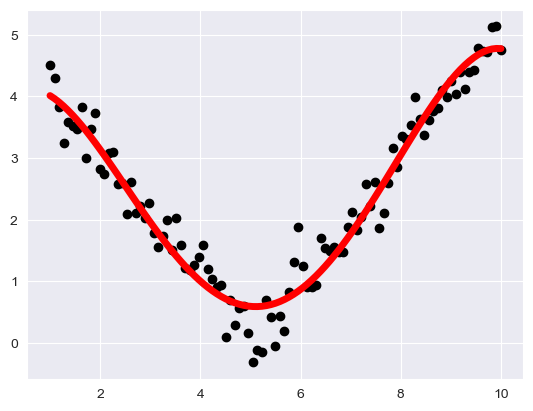

In [267]:
# Plot
new_x = numpy.linspace(1, 10, 101)
new_xx = pandas.DataFrame.from_dict(
    {'x1': new_x, 'x2': new_x**2, 'x3': new_x**3, 'x4': new_x**4})

plt.plot(x, y, 'ko')
plt.plot(new_x, reg3.predict(new_xx), 'r-', linewidth=5)

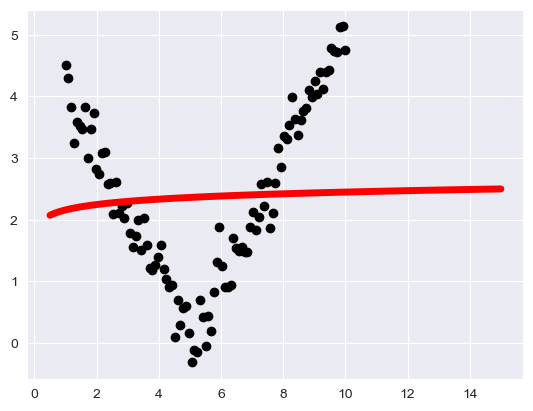

In [268]:
# Plot
new_x = numpy.linspace(0.5, 15, 101).reshape(-1, 1)

plt.plot(x, y, 'ko')
plt.plot(new_x, reg2.predict(transformation(new_x)), 'r-', linewidth=5)